# 📦 Sobre o Dataset – Brazilian E-Commerce Public Dataset by Olist

Este conjunto de dados públicos contém informações reais e anonimizadas de cerca de **100 mil pedidos realizados entre 2016 e 2018** em diversos marketplaces brasileiros, através da **loja da Olist**. Ele oferece uma visão completa da jornada de compra do cliente, permitindo análises sob diversas perspectivas:

## 🔍 Informações disponíveis
- **Status do pedido** (entregue, cancelado etc.)
- **Preços e formas de pagamento**
- **Frete e desempenho de entrega**
- **Localização dos clientes**
- **Características dos produtos**
- **Avaliações e comentários dos consumidores**

Um **dataset de geolocalização** também está incluído, relacionando CEPs brasileiros com coordenadas (lat/lng).

> ⚠️ **Nota:** Um pedido pode conter vários itens, e cada item pode ser enviado por um vendedor diferente. Todos os nomes reais de lojas e parceiros foram substituídos por **nomes de casas de Game of Thrones**, por questões de anonimização.

---

## 🔗 Integração com dados de Marketing

Existe um segundo dataset disponibilizado com dados do **funil de marketing da Olist**. É possível combiná-los para análises que vão desde a origem do cliente até o pós-venda. Instruções de junção estão disponíveis em notebooks do Kaggle.

---

## 🏢 Sobre a Olist

A **Olist** é a maior loja de departamentos dentro dos marketplaces brasileiros. Ela conecta pequenos lojistas a grandes canais de venda por meio de uma infraestrutura simplificada. Após a compra, o vendedor é notificado para enviar o produto. Depois da entrega (ou na data estimada), o cliente recebe uma pesquisa de satisfação.

---

## 💡 Inspirações para projetos com este dataset

Este dataset é ideal para projetos de Ciência de Dados e Aprendizado de Máquina:

- 🧠 **NLP**: Análise textual de avaliações dos clientes.
- 🔍 **Clustering**: Explorar por que alguns clientes não avaliam (satisfação implícita?).
- 📈 **Previsão de vendas**: Usar datas de compra para prever demanda futura.
- 🚚 **Desempenho logístico**: Estimar e otimizar prazos de entrega.
- 🛒 **Qualidade de produtos**: Descobrir quais categorias geram mais insatisfação.
- 🔧 **Engenharia de atributos**: Criar novas variáveis ou enriquecer os dados com fontes externas.

---

> 🔗 Site da Olist: [https://www.olist.com](https://www.olist.com)


## 🗂️ Esquema de Dados (Data Schema)

Abaixo está o diagrama de relacionamento entre as tabelas do conjunto de dados de e-commerce brasileiro da Olist. Este diagrama ajuda a visualizar como as diferentes tabelas estão conectadas, facilitando a compreensão das relações entre pedidos, clientes, produtos, pagamentos, avaliações e geolocalização.

![Diagrama de Relacionamento das Tabelas](https://i.imgur.com/HRhd2Y0.png)



## Pacotes

In [ ]:
import os
import zipfile
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Download

In [ ]:
!gdown 1pT4ecHmtztanoEJOyB9a0SkXa8F8DGsH

Downloading...
From (original): https://drive.google.com/uc?id=1pT4ecHmtztanoEJOyB9a0SkXa8F8DGsH
From (redirected): https://drive.google.com/uc?id=1pT4ecHmtztanoEJOyB9a0SkXa8F8DGsH&confirm=t&uuid=7802243a-a52a-4e5f-a104-c75052b3e18c
To: /content/olist.zip
100% 44.7M/44.7M [00:00<00:00, 60.4MB/s]


In [ ]:
# Extrair os arquivos CSV
with zipfile.ZipFile("olist.zip", 'r') as zip_ref:
    zip_ref.extractall("olist_data")

# Listar arquivos extraídos
files = sorted(os.listdir("olist_data"))
csv_files = [f for f in files if f.endswith(".csv")]
csv_files

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

## olist_orders_dataset

Contém informações gerais sobre cada pedido realizado na Olist. Cada linha representa um pedido com dados sobre o cliente, status do pedido, datas de compra, aprovação, envio e entrega.

In [ ]:
orders = pd.read_csv("olist_data/olist_orders_dataset.csv")
print("orders", orders.shape)

orders (99441, 8)


In [ ]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


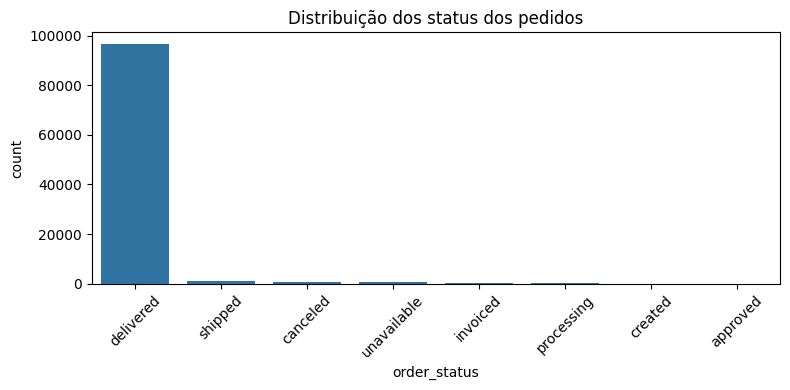

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x="order_status", data=orders, order=orders["order_status"].value_counts().index)
plt.title("Distribuição dos status dos pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

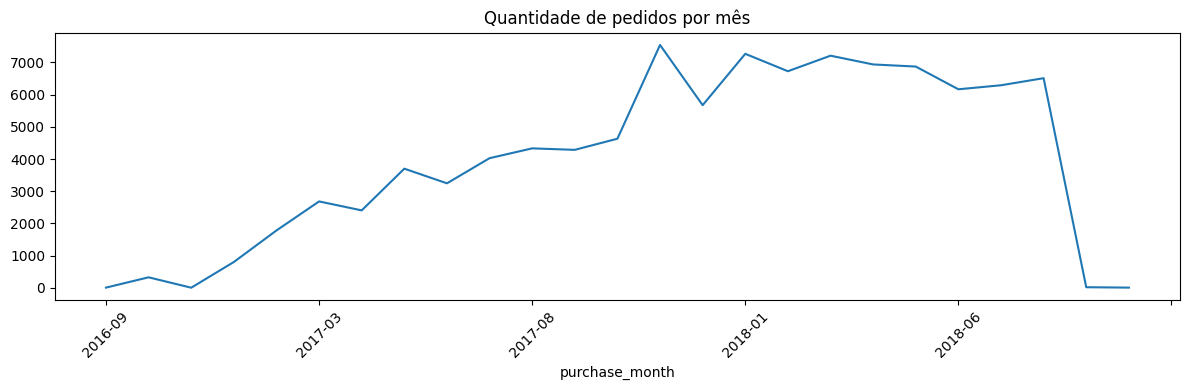

In [ ]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["purchase_month"] = orders["order_purchase_timestamp"].dt.to_period("M").astype(str)
monthly_orders = orders.groupby("purchase_month").size()

plt.figure(figsize=(12, 4))
monthly_orders.plot()
plt.title("Quantidade de pedidos por mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## olist_order_items_dataset

Contém os itens que compõem cada pedido. Um pedido pode conter vários produtos, e cada produto pode ser enviado por um vendedor diferente. Esta tabela relaciona produtos a pedidos.


In [ ]:
items = pd.read_csv("olist_data/olist_order_items_dataset.csv")
print("order_items", items.shape)

order_items (112650, 7)


In [ ]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


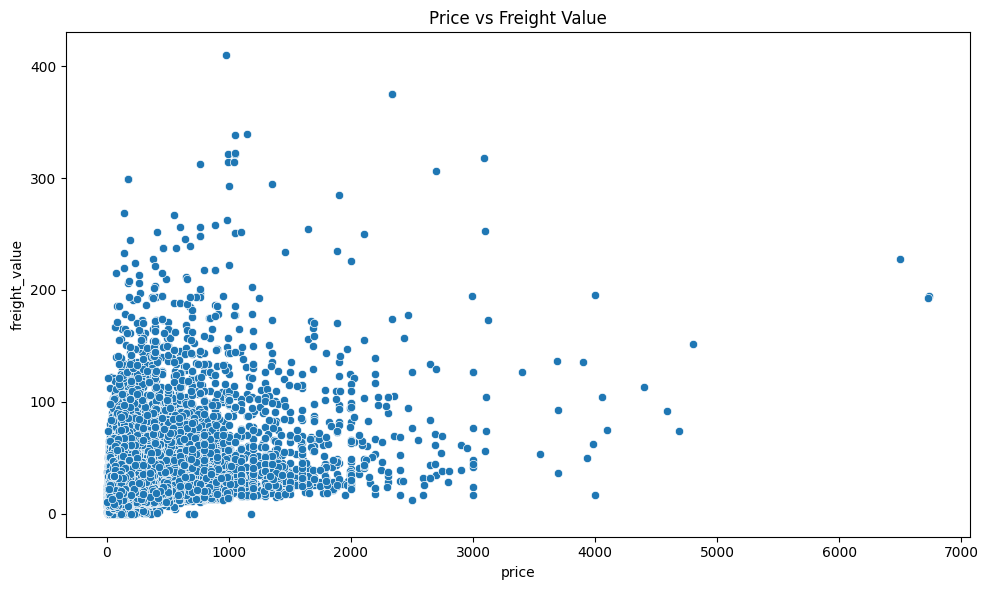

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=items, x='price', y='freight_value')
plt.title('Price vs Freight Value')
plt.tight_layout()
plt.show()

## olist_order_payments_dataset

Informações sobre os pagamentos realizados em cada pedido, incluindo o tipo de pagamento (boleto, cartão, etc.), número de parcelas e valor pago.


In [ ]:
payments = pd.read_csv("olist_data/olist_order_payments_dataset.csv")
print("payments", payments.shape)

payments (103886, 5)


In [ ]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


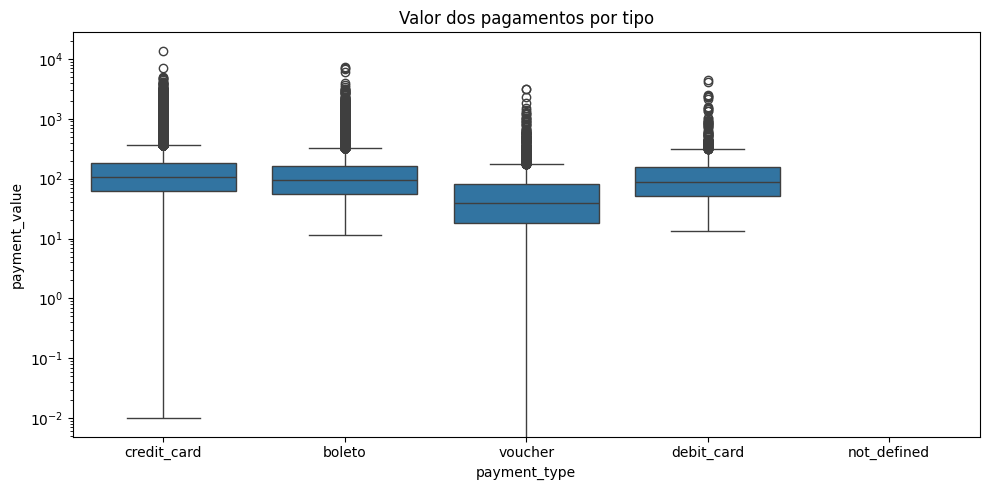

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=payments, x="payment_type", y="payment_value")
plt.yscale('log')
plt.title("Valor dos pagamentos por tipo")
plt.tight_layout()
plt.show()

## olist_order_reviews_dataset

Avaliações dos clientes para os pedidos. Inclui a nota (de 1 a 5), data da avaliação e comentários escritos, o que permite análises de sentimentos e satisfação.


In [ ]:
reviews = pd.read_csv("olist_data/olist_order_reviews_dataset.csv")
print("reviews", reviews.shape)

reviews (99224, 7)


In [ ]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


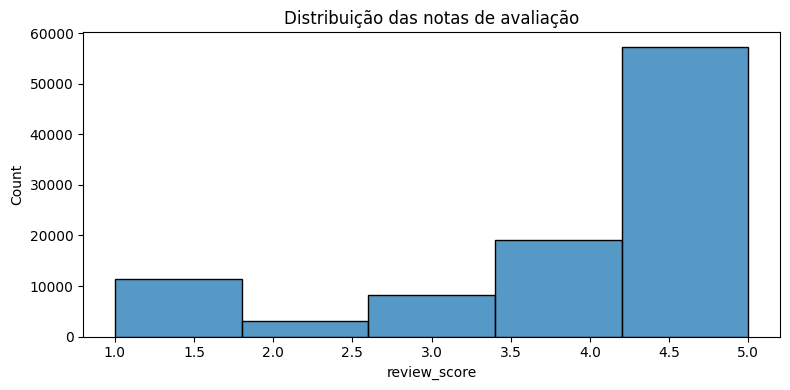

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=reviews, x="review_score", bins=5)
plt.title("Distribuição das notas de avaliação")
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap: atraso x review_score
orders_reviews = pd.merge(orders, reviews, on='order_id')
orders_reviews = orders_reviews.dropna(subset=['order_delivered_customer_date'])
orders_reviews["atraso_dias"] = (
    orders_reviews["order_delivered_customer_date"] - orders_reviews["order_estimated_delivery_date"]
).dt.days

bins = [-1, 0, 2, 5, 8, 12, 16, 21, 30, 60, 100, 150]
labels = ["0", "1-2", "3-5", "6-8", "9-12", "13-16", "17-21", "22-30", "31-60", "61-100", "101+"]

orders_reviews["faixa_atraso"] = pd.cut(orders_reviews["atraso_dias"], bins=bins, labels=labels)

pivot = pd.pivot_table(
    orders_reviews,
    values="order_id",
    index="review_score",
    columns="faixa_atraso",
    aggfunc="count",
    observed=False
)

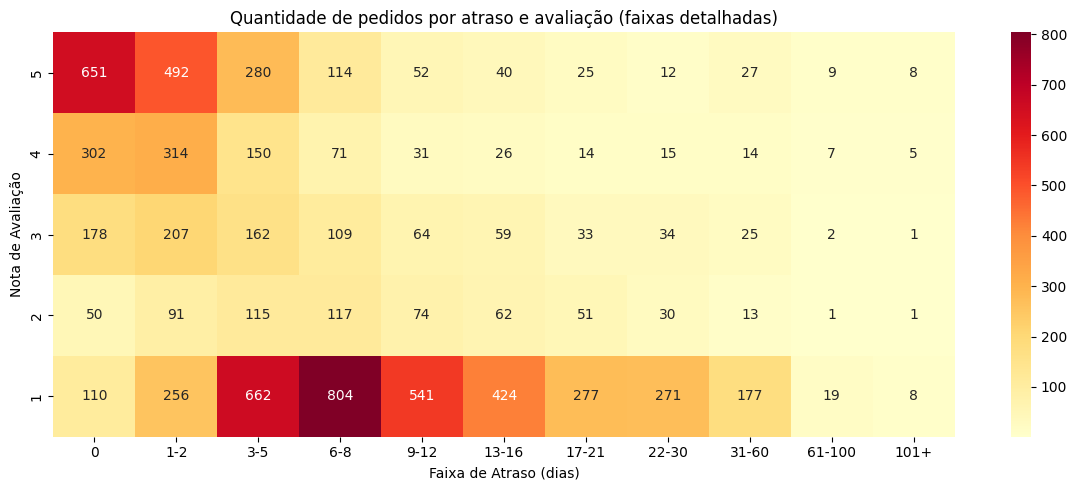

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".0f")
ax.invert_yaxis()
plt.title("Quantidade de pedidos por atraso e avaliação (faixas detalhadas)")
plt.xlabel("Faixa de Atraso (dias)")
plt.ylabel("Nota de Avaliação")
plt.tight_layout()
plt.show()

## olist_customers_dataset

Informações dos clientes, como ID único, cidade e estado de residência. Esta tabela permite agrupar dados por região e realizar análises geográficas.


In [ ]:
customers = pd.read_csv("olist_data/olist_customers_dataset.csv")
print("customers", customers.shape)

customers (99441, 5)


In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


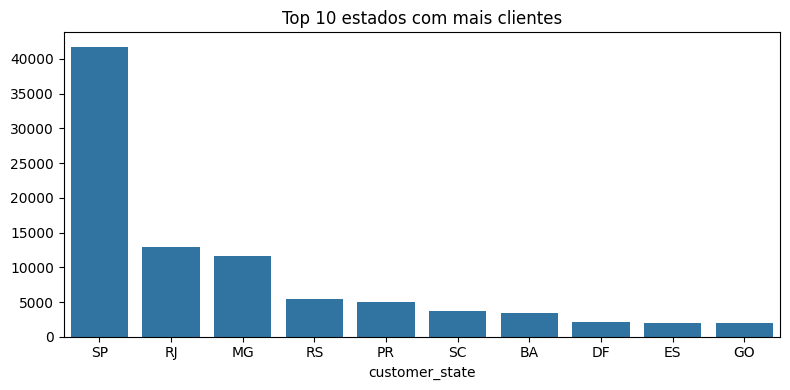

In [ ]:
top_states = customers['customer_state'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 estados com mais clientes")
plt.tight_layout()
plt.show()

## olist_products_dataset

Contém informações detalhadas sobre os produtos, como nome da categoria, dimensões (peso, altura, largura, comprimento) e ID do produto.


In [ ]:
products = pd.read_csv("olist_data/olist_products_dataset.csv")
print("products", products.shape)

products (32951, 9)


In [ ]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


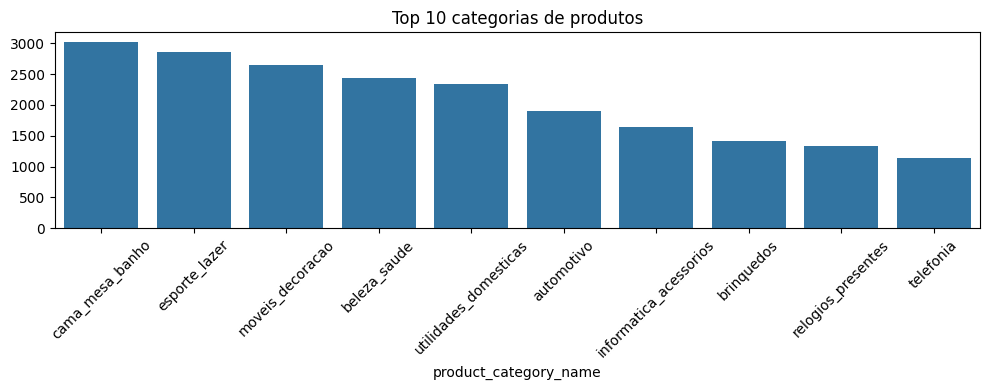

In [ ]:
top_categories = products['product_category_name'].value_counts().head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top 10 categorias de produtos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

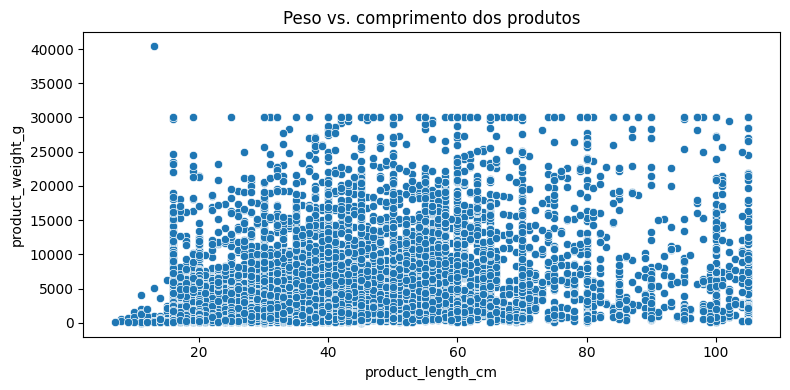

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x="product_length_cm", y="product_weight_g", data=products.dropna())
plt.title("Peso vs. comprimento dos produtos")
plt.tight_layout()
plt.show()

In [ ]:
# Média de avaliação por categoria de produto
merged = pd.merge(items, products, on="product_id")
merged = pd.merge(merged, reviews[['order_id', 'review_score']], on="order_id")
media_categoria = merged.groupby("product_category_name")["review_score"].mean().sort_values(ascending=False).head(10)

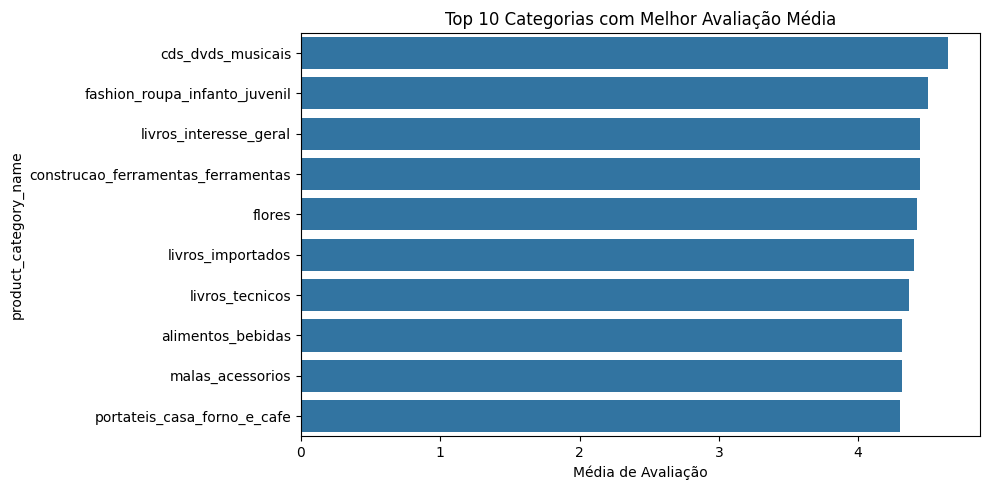

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=media_categoria.values, y=media_categoria.index)
plt.title("Top 10 Categorias com Melhor Avaliação Média")
plt.xlabel("Média de Avaliação")
plt.tight_layout()
plt.show()

In [ ]:
orders["dias_entrega"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

merged_df = orders[["order_id", "dias_entrega"]].merge(payments, on="order_id")
merged_df = merged_df.merge(items, on="order_id")
merged_df = merged_df.merge(products, on="product_id")

# Selecionar apenas colunas numéricas
numeric_cols = [
    "dias_entrega", "payment_value", "payment_installments",
    "price", "freight_value",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
]
corr_matrix = merged_df[numeric_cols].corr()

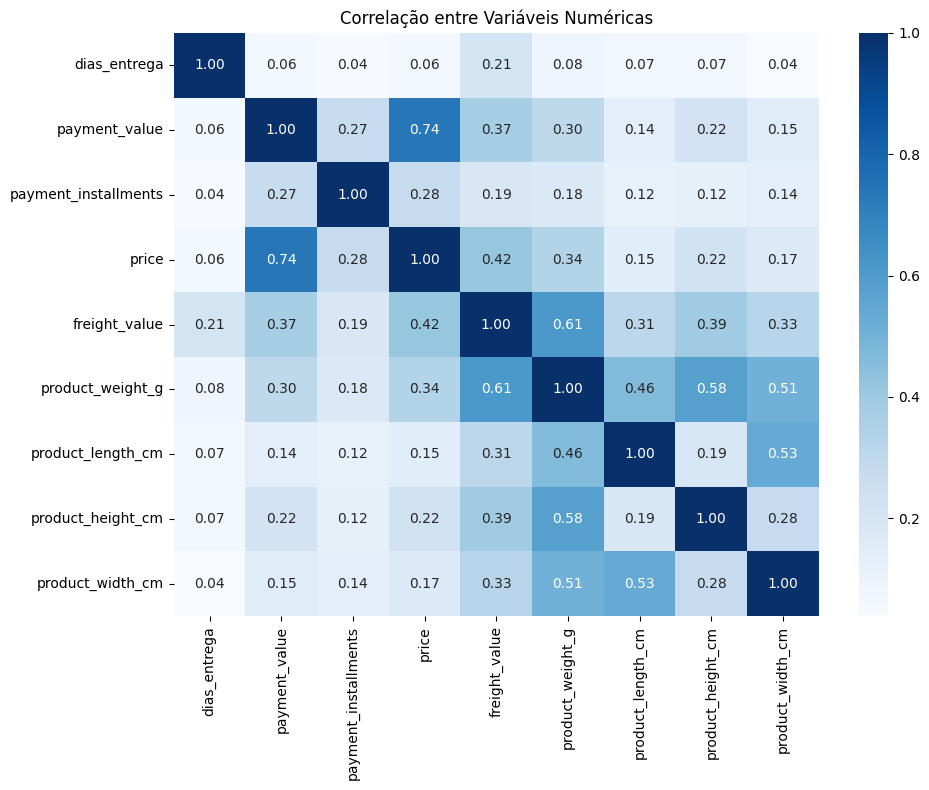

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

## olist_sellers_dataset

Informações sobre os vendedores, incluindo localização (cidade e estado). Cada vendedor possui um ID único.


In [ ]:
sellers = pd.read_csv("olist_data/olist_sellers_dataset.csv")
print("sellers", sellers.shape)

sellers (3095, 4)


In [ ]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


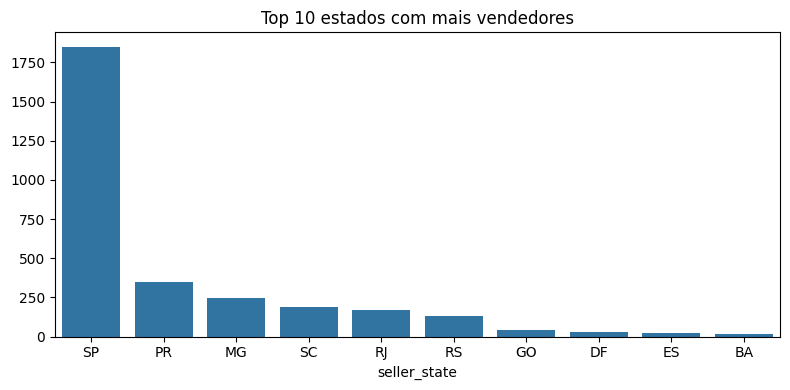

In [ ]:
top_seller_states = sellers["seller_state"].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_seller_states.index, y=top_seller_states.values)
plt.title("Top 10 estados com mais vendedores")
plt.tight_layout()
plt.show()

## olist_geolocation_dataset

Relação entre CEPs brasileiros e coordenadas geográficas (latitude e longitude), permitindo análise espacial e visualização de distribuição geográfica.


In [ ]:
geo = pd.read_csv("olist_data/olist_geolocation_dataset.csv")
print("geolocation", geo.shape)

geolocation (1000163, 5)


In [ ]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


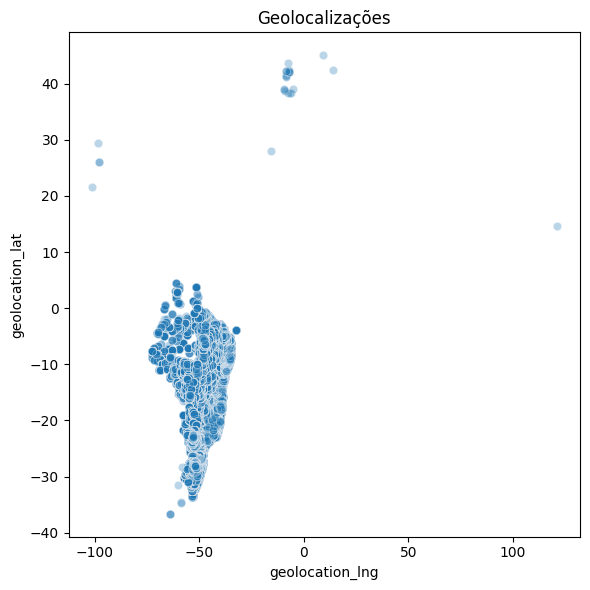

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="geolocation_lng", y="geolocation_lat", data=geo, alpha=0.3)
plt.title("Geolocalizações")
plt.tight_layout()
plt.show()

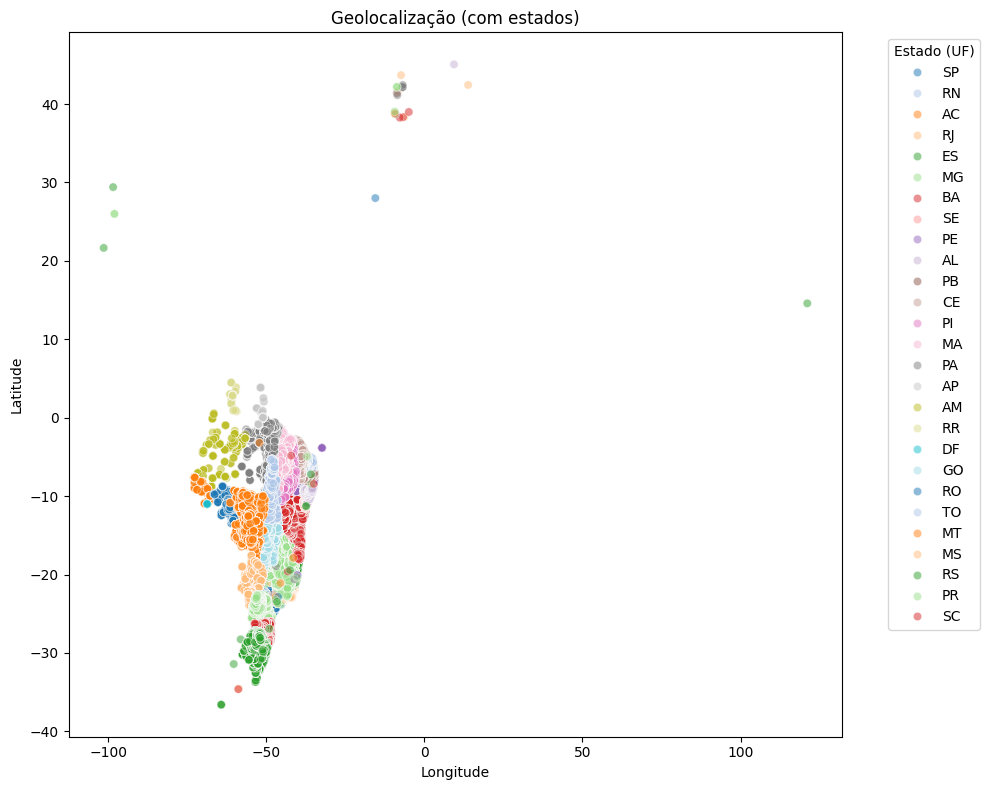

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=geo,
    x="geolocation_lng",
    y="geolocation_lat",
    hue="geolocation_state",
    palette="tab20",
    alpha=0.5,
    legend="full"
)
plt.title("Geolocalização (com estados)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Estado (UF)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

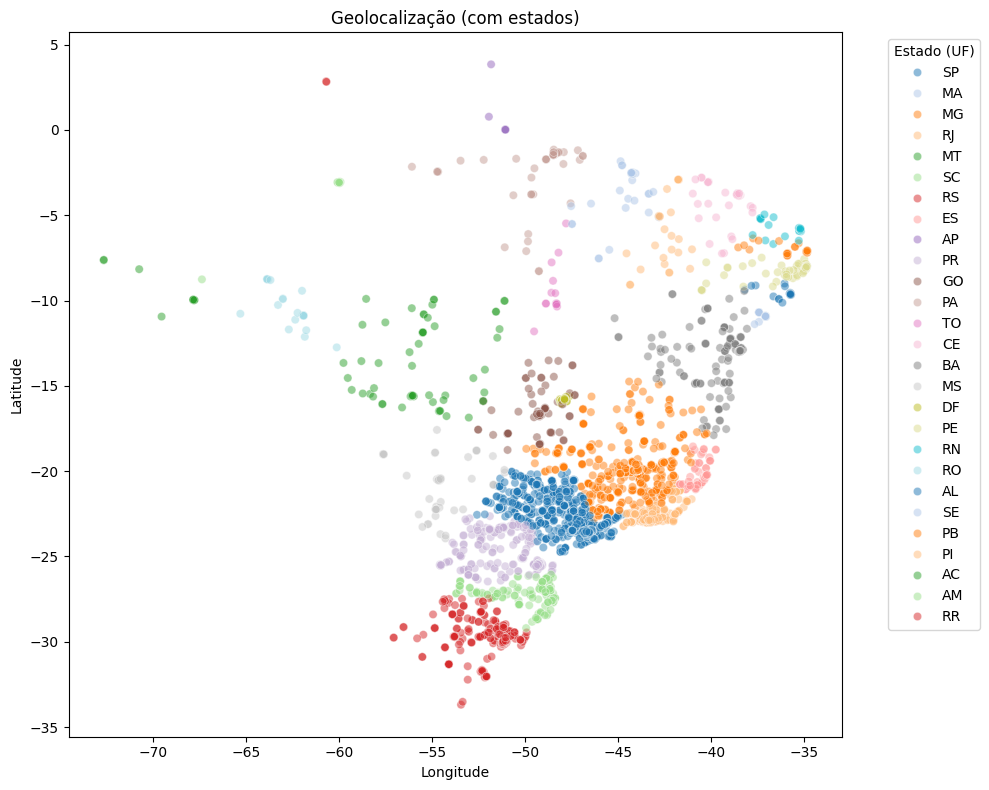

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=geo.sample(5000),
    x="geolocation_lng",
    y="geolocation_lat",
    hue="geolocation_state",
    palette="tab20",
    alpha=0.5,
    legend="full"
)
plt.title("Geolocalização (com estados)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Estado (UF)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## product_category_name_translation

Tabela de tradução dos nomes das categorias de produtos do português para o inglês. Útil para visualizações e análises com públicos internacionais.

In [ ]:
translations = pd.read_csv("olist_data/product_category_name_translation.csv")
print("translations", translations.shape)

translations (71, 2)


In [ ]:
translations

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
